## 911 - Calls Capstone Project

In [ ]:
#Libraries
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#setting the style of the plots
sns.set_style('whitegrid')

Fetching the 911 Calls csv file from local directory.

In [ ]:
uploads = files.upload()

Saving 911.csv to 911.csv


In [ ]:
calls.shape

(99492, 9)

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


 From the above, the dataset does not have null values, columns like zip and township (twp) have a distinct non null count because of the presence of Nan Values which was not accounted for in the count.

In [ ]:
type(calls.loc[0, 'timeStamp'])

str

The timeStamp Values are strings, they need to be converted to Time Object using pd.to_datetime, for further exploratory Analysis.

In [ ]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

In [ ]:
calls.loc[0, 'timeStamp']

Timestamp('2015-12-10 17:40:00')

Now we can use the Dataset to Answer some relevant Questions

 **EXPLORATORY ANALYSIS**

What are the top 5 townships (twp) for 911 calls?

In [ ]:
calls['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

What are the top 5 zipcodes for 911 calls?

In [ ]:
calls['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The count of Unique titles.

In [ ]:
calls['title'].nunique()

110

Creating new features from the Title column. There are Values like EMS, FIRE, and TRAFFIC which represents the broad reasons why Calls were placed.

So I will be creating a Reason column for better understanding of the dataset and to profer answers to some Questions.

In [ ]:
calls['reason'] = calls['title'].apply(lambda x: x.split(':')[0])
calls.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


What is the most common Reason for a 911 call?

In [ ]:
calls['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

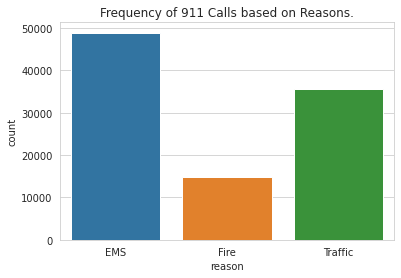

In [ ]:
sns.countplot(x = 'reason', data = calls)
plt.title('Frequency of 911 Calls based on Reasons.')
plt.show()



```
We can see that an higher percent of the 911 calls was for Health Emergency.
```



Other Features can still be created from the timeStamp column which I converted to time objects. To better understand and analyse the dataset the time stamp will be used to create a column for hours, Months and Days of the Week.

In [ ]:
calls['hour'] = calls['timeStamp'].apply(lambda x: x.hour)
calls['month'] = calls['timeStamp'].apply(lambda x: x.month)
calls['day of the week'] = calls['timeStamp'].apply(lambda x: x.dayofweek)

In [ ]:
calls['day of the week'].head(3)

0    3
1    3
2    3
Name: day of the week, dtype: int64

In [ ]:
#the days of the week are encoded, the following codes are used to decode it
days = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
dmaps = {ind: day for ind, day in enumerate(days)}
dmaps

{0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [ ]:
#to decode it using map method
calls['day of the week'] = calls['day of the week'].map(dmaps)
calls['day of the week'].head(3)

0    Thur
1    Thur
2    Thur
Name: day of the week, dtype: object

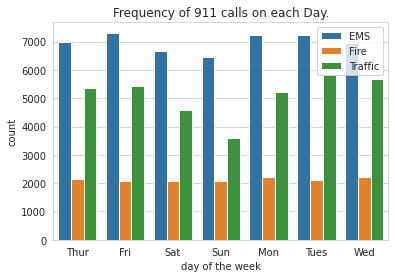

In [ ]:
sns.countplot(x = 'day of the week', data = calls, hue = 'reason')
plt.title('Frequency of 911 calls on each Day.')
plt.legend(loc = 'upper right')
plt.show()

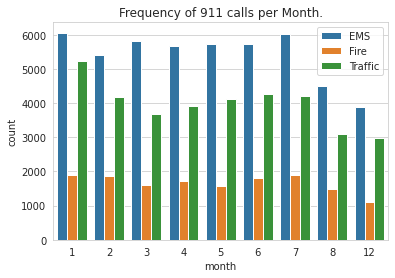

In [ ]:
sns.countplot(x = 'month', data = calls, hue = 'reason')
plt.title('Frequency of 911 calls per Month.')
plt.legend(loc = 'upper right')
plt.show()

From above, some months like 9, 10 and 11 (Sep., Oct. and Nov.) are missing. So to better visualise the Calls per month, I will have to group the Dataframe by Month. 

In [ ]:
byMonths = calls.groupby('month').count()
byMonths.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of the week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101


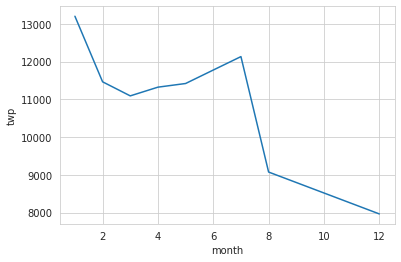

In [ ]:
sns.lineplot(x = byMonths.index, y = 'twp', data = byMonths)

Creating a Linear fitting for the above plot.

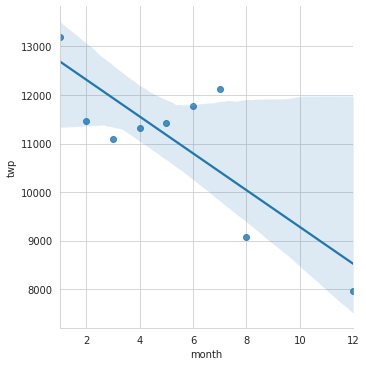

In [ ]:
byMonths = byMonths.reset_index()
sns.lmplot(x = 'month', y = 'twp', data = byMonths)

Since we have made analysis into the days and Months data, lets dive into the timeStamp column in full by creating another feature called Date.

In [ ]:
calls['date'] = calls['timeStamp'].apply(lambda x: x.date())

 Grouping the dataset by date.

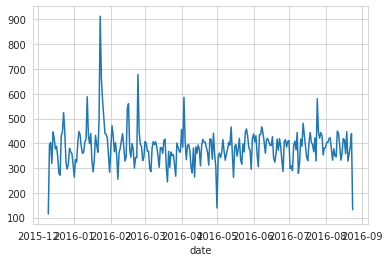

In [ ]:
date = calls.groupby('date').count()
date['twp'].plot()

Creating a separate feature and ploting the Reasons (EMS, Fire, Traffic) for 911 calls by Date.

In [ ]:
EMS = calls[calls['reason'] == 'EMS'].groupby('date').count()
Traffic = calls[calls['reason'] == 'Traffic'].groupby('date').count()
Fire = calls[calls['reason'] == 'Fire'].groupby('date').count()

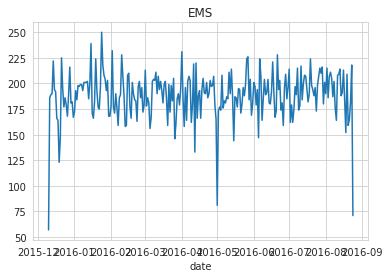

In [ ]:
EMS.twp.plot()
plt.title('EMS')
plt.show()

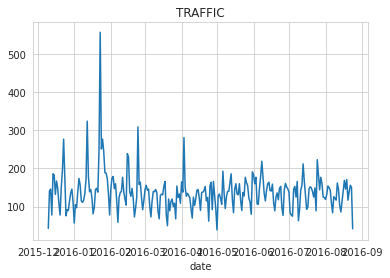

In [ ]:
Traffic.twp.plot()
plt.title('TRAFFIC')
plt.show()

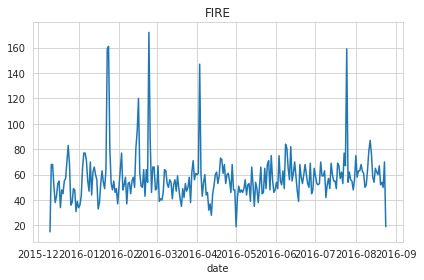

In [ ]:
Fire.twp.plot()
plt.title('FIRE')
plt.tight_layout()
plt.show()

Going further into the days for exploratory Analysis.

In [ ]:
day_per_hours = calls.groupby(['day of the week', 'hour']).count()['reason'].unstack()
day_per_hours.head(3)

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day of the week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467


HEATMAP AND CLUSTER MAP





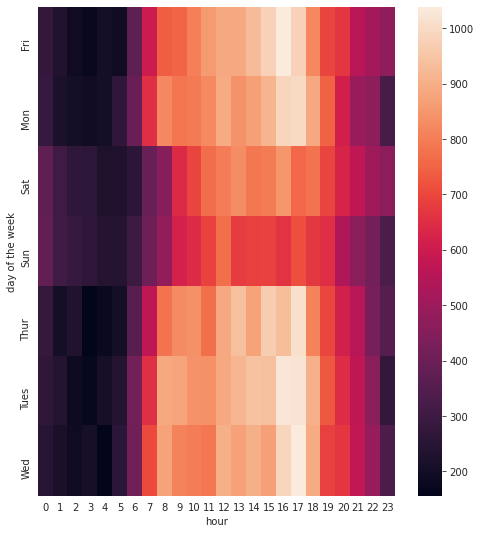

In [ ]:
plt.figure(figsize = (8,9))
sns.heatmap(day_per_hours)

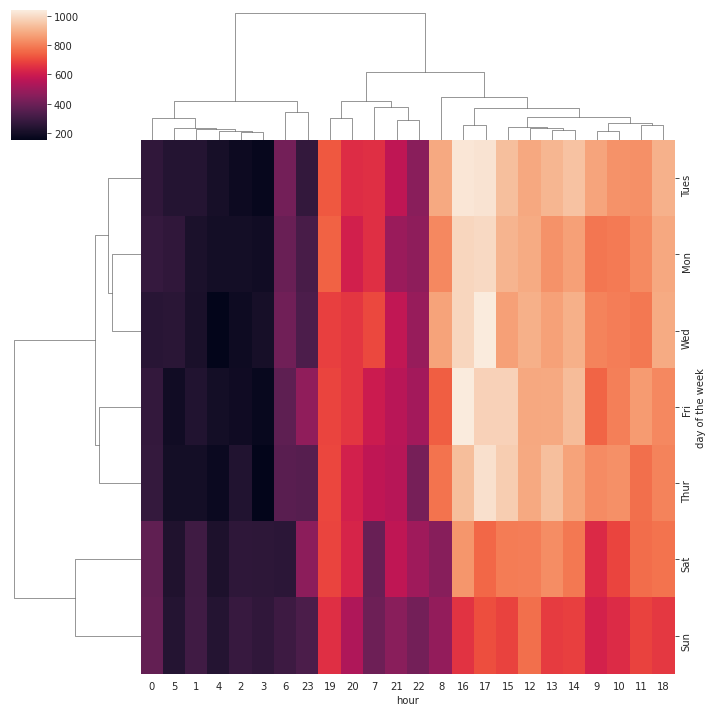

In [ ]:
sns.clustermap(day_per_hours)

In [ ]:
dayMonth = calls.groupby(['day of the week', 'month']).count()['reason'].unstack()
dayMonth.head(3)

month,1,2,3,4,5,6,7,8,12
day of the week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978


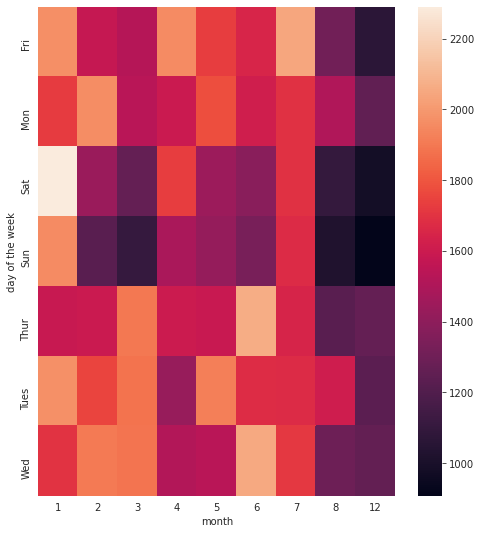

In [ ]:
plt.figure(figsize = (8,9))
sns.heatmap(dayMonth)

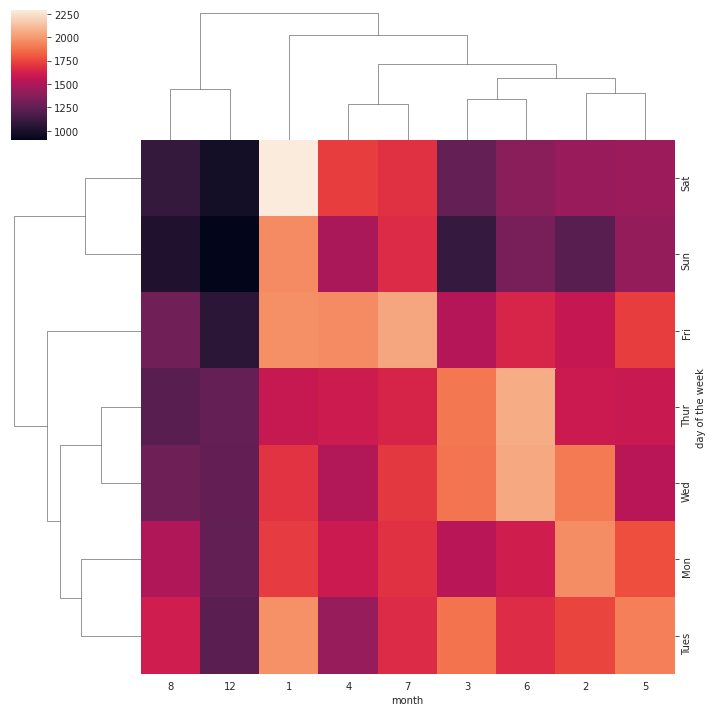

In [ ]:
sns.clustermap(dayMonth)